# Machine Learning

**Textbook is available @ [https://www.github.com/a-mhamdi/mlpy](https://www.github.com/a-mhamdi/mlpy)**

---

Linear regression is a statistical method used to model the linear relationship between a dependent variable and one or more independent variables. Simple linear regression is a type of linear regression that involves only one independent variable.

## Simple Linear Regression

The goal is to find the line of best fit that represents the relationship between the independent variable (aka the predictor or explanatory variable) and the dependent variable (aka the response or outcome variable). The line of best fit is a line that is as close as possible to the data points in the scatterplot of the variables.

### Libraries and settings

In [29]:
import numpy as np
import pandas as pd

In [30]:
np.set_printoptions(precision=2)

In [31]:
from matplotlib import pyplot as plt
plt.rc('figure', figsize=(6, 4))

In [32]:
#%matplotlib widget

`%matplotlib widget` is a magic command in _Jupyter_ Notebooks which enables interactive features such as panning, zooming of plots, as well as the ability to hover over data point to display their values.

### Importing the dataset

In [33]:
df = pd.read_csv('../Datasets/Salary_Data.csv')

In [34]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [36]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [37]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Data split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=123)

### Training

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
theta_1 = lr.coef_
theta_1

array([9362.62])

In [43]:
b = lr.intercept_
b

np.float64(25909.97173284251)

### Prediction and evaluation

In [44]:
y_pred = lr.predict(X_test)

#### Evaluation Metrics

First of all, let's compute, using the basic operations, the mean absolute, mean squared and mean absolute percentage errors:

In [45]:
mae = np.abs(y_pred-y_test)
mae.mean()

np.float64(5218.304759400475)

In [46]:
mse = (y_pred-y_test)**2
mse.mean()

np.float64(36508122.71594656)

In [47]:
mape = np.abs( (y_pred-y_test)/y_test )
mape.mean()

np.float64(0.06935248260498447)

We can also evaluate the mean absolute error, the mean squared error and the mean absolute percentage error, denoted here `mae`, `mse` and `mape`, by calling the built-in methods `mean_absolute_error`, `mean_squared_error` and `mean_absolute_percentage_error`

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mae

5218.304759400475

In [50]:
mse = mean_squared_error(y_test, y_pred)
mse

36508122.71594656

In [51]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.06935248260498447

#### Visualization

We can also use _Matplotlib_ to visualize the line of best fit, to which, we add the original test data points in a `scatterplot`.

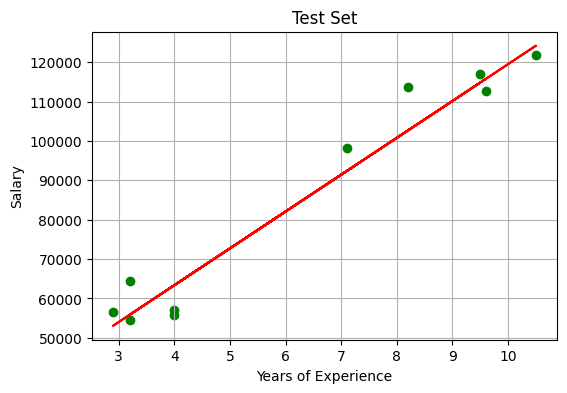

In [52]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red')
plt.title('Test Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid()

### BONUS

The following cells are to check the validity of `lr` against the normal equation, aka, **Ordinary Least Squares (OLS)** method as seen in class. For the sake of simplicity, we suppose we don't fit the intercept.

In [53]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [54]:
theta_1 = lr.coef_
theta_1

array([13495.97])

In [55]:
b = lr.intercept_
b

0.0

Check the value of `theta_1` using **OLS**:

$$\hat{\theta} \;=\; \displaystyle\dfrac{\displaystyle\sum_{i=0}^{n-1} y_i x_i}{\displaystyle\sum_{i=0}^{n-1} x_i^2}$$

In [56]:
theta_hat = (y_train @ X_train)/(X_train.T @ X_train)
theta_hat

array([[13495.97]])